# **AI Career Advisor**: A Predictive Model for Career Path Selection.

## **Description**

This project will leverage machine learning to guide individuals in discovering career paths aligned with their personalities, interests, and work preferences. By analyzing a range of factors, the model aims to provide tailored career recommendations for individuals just starting out, and professionals seeking a career transition.

## **Initial Road Map**

#### **Define the Problem:**

The aim of this project is to predict or recommend career paths based on certain criteria; this requires taking into consideration some factors that could influence individual career decisions, such as:

* Personality traits
* Interests or hobbies
* Skills or strengths
* Educational background
* Work-life balance preferences

**Data Collection:**

* Conduct a survey to gather my own data.

**Feature Selection:**

* Identify which features (e.g., personality type, education level, interest areas) will be used to train the model.

**Modeling:**

* Classification algorithms to predict the suitable career. For example:Random Forest or Decision Trees might be a good start since they handle categorical data well.

* Logistic Regression or even K-Nearest Neighbors.

* Recommendation systems or clustering techniques.(For a broader range of careers)

**Evaluation:**

* Test model to see how well it predicts a career based on a test set of data. Use metrics like accuracy, precision, and recall.

**Interface/User Interaction:**

* Create a simple web or app interface where users input their details, and the model returns career suggestions.
* Use Flask (Python) or other frameworks like Streamlit.

**Resources:**

Libraries: 

* pandas scikit-learn
* XGBoost for data processing and modeling.



### **Data Preprocessing**

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

# Load dataset
df = pd.read_csv('Career Path Survey.csv')

In [100]:
df.head()

,Timestamp,What is your gender?,What is your current employment status?,How many years of professional work experience do you have?,What is your highest level of education?,What is your age?,What is the main reason you are looking to transition into a new career?,"Other, pls specify",What field(s) are you considering for your career transition?,What challenges do you anticipate in making this transition?,"Other, please specify",What is your current job title or industry (if applicable)?,"How satisfied are you with your current career?\n(On a scale of 1 to 5, where 1 = not satisfied and 5 = highly satisfied)",What is your primary motivation for changing careers or choosing a career path?,"Other, please specify .1",What type of career do you aspire to have in the future?,Which technical skills do you have? (Select all that apply),"Other, pls specify",Which soft skills do you possess? (Select all that apply),"Other, please specify .2",Do you have any professional certifications or licenses?,"If Yes, please specify",How do you usually spend your free time?,How do you prefer to recharge after a long day?,"In large social gatherings, do you typically feel",How would you describe yourself in conversations?,Which type of work environment do you prefer?,Do you prefer working in,How do you handle uncertainty or change in the workplace?,What is your ideal work-life balance?
0,9/29/2024 12:08:43,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,The water,Tech,Difficulty finding opportunities,The water,Transcriptionist,3.0,Financial reasons,Thejswj kkakka,Better,Other,Transcribing and editing,"Problem solving, Time management",NaN,Yes,TRCN,Spending time alone or in quiet reflection,NaN,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time
1,9/29/2024 15:04:09,Female,Employed full-time,1-3 years,Master’s degree,25-34,NaN,NaN,NaN,NaN,NaN,Education,3.0,More fulfilling work,Sciences,Tech,Sales,NaN,"Communication, Teamwork, Problem solving, Time...",Entrepreneur,No,NaN,Socializing with friends or attending events,Spending time alone or in quiet reflection,Energized and excited by the group,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
2,9/29/2024 15:16:10,Female,"Unemployed, looking for work",10+ years,Master’s degree,35-44,Seeking higher income or more security,Financial instability during the transition,Academics,Difficulty finding opportunities,Looking for other work balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9/29/2024 16:43:13,Female,Employed full-time,4-7 years,Bachelor’s degree,25-34,NaN,NaN,NaN,NaN,NaN,Animal House Scientist,4.0,Career growth or promotion,Nil,Lecturing,Other,Nil,"Leadership, Time management",Nil,Yes,Yes,Spending time alone or with one or two close f...,Being with people or engaging in social activi...,Overwhelmed and prefer smaller groups,I often start conversations and talk a lot,"Structured, organized, and predictable",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
4,9/29/2024 19:19:23,Male,Employed full-time,10+ years,Master’s degree,45-54,Personal growth or a new challenge,New challenge and decision making,Executive Management,Difficulty finding opportunities,Don’t desire to leave the shore of the country...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# Preprocess dataset
# Drop redundant columns
df.drop(columns=['Timestamp'], inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 29 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   What is your gender?                                                                                                      83 non-null     object 
 1   What is your current employment status?                                                                                   83 non-null     object 
 2   How many years of professional work experience do you have?                                                               65 non-null     object 
 3   What is your highest level of education?                                                                                  83 non-null    

In [103]:
df.duplicated().sum()

0

In [104]:
#Remove whitespaces
df.columns = df.columns.str.strip()

In [105]:
# Dropping specific columns by name
df.drop(columns=['Other, please specify .1','Other, please specify .2', 'Other, pls specify'], inplace=True)


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 25 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   What is your gender?                                                                                                      83 non-null     object 
 1   What is your current employment status?                                                                                   83 non-null     object 
 2   How many years of professional work experience do you have?                                                               65 non-null     object 
 3   What is your highest level of education?                                                                                  83 non-null    

In [107]:
#Create new column labels 

# Define a dictionary with old column names as keys and new column names as values
new_column_names = {
    'What is your gender?': 'gender',
    'What is your current employment status?': 'employment_status',
    'How many years of professional work experience do you have?': 'years_experience',
    'What is your highest level of education?': 'education_level',
    'What is your age?': 'age',
    'What is the main reason you are looking to transition into a new career?': 'transition_reason',
    'What field(s) are you considering for your career transition?': 'transition_career',
    'What challenges do you anticipate in making this transition?': 'transition_challenge',
    'Other, please specify': 'challenges_other',
    'What is your current job title or industry (if applicable)?': 'current_job_title',
    'How satisfied are you with your current career?\n(On a scale of 1 to 5, where 1 = not satisfied and 5 = highly satisfied)': 'career_satisfaction',
    'What is your primary motivation for changing careers or choosing a career path?': 'primary_motivation',
    'What type of career do you aspire to have in the future?': 'aspired_job',
    'Which technical skills do you have? (Select all that apply)': 'technical_skills',
    'Other, pls specify ': 'technical_skills_other',
    'Which soft skills do you possess? (Select all that apply)': 'soft_skills',
    'Do you have any professional certifications or licenses?': 'has_certifications',
    'If Yes, please specify': 'certification',
    'How do you usually spend your free time?': 'free_time_activity',
    'How do you prefer to recharge after a long day?': 'recharge_preference',
    'In large social gatherings, do you typically feel': 'social_gathering_feelings',
    'How would you describe yourself in conversations?': 'conversation_style',
    'Which type of work environment do you prefer?': 'work_environment',
    'Do you prefer working in': 'work_style',
    'How do you handle uncertainty or change in the workplace?': 'uncertainty_handling',
    'What is your ideal work-life balance?': 'work_life_balance'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [108]:
pd.set_option('display.max_columns', None)

In [109]:
df.head(1)

,gender,employment_status,years_experience,education_level,age,transition_reason,transition_career,transition_challenge,challenges_other,current_job_title,career_satisfaction,primary_motivation,aspired_job,technical_skills,soft_skills,has_certifications,certification,free_time_activity,recharge_preference,social_gathering_feelings,conversation_style,work_environment,work_style,uncertainty_handling,work_life_balance
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,Tech,Difficulty finding opportunities,The water,Transcriptionist,3.0,Financial reasons,Better,Other,"Problem solving, Time management",Yes,TRCN,Spending time alone or in quiet reflection,NaN,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time


#### Handling Missing Values

In [110]:
df.isnull().sum()

gender                        0
employment_status             0
years_experience             18
education_level               0
age                           0
transition_reason            34
transition_career            41
transition_challenge         36
challenges_other             74
current_job_title            20
career_satisfaction          18
primary_motivation           18
aspired_job                  18
technical_skills              8
soft_skills                   8
has_certifications            8
certification                52
free_time_activity           18
recharge_preference          20
social_gathering_feelings    18
conversation_style           18
work_environment             18
work_style                   18
uncertainty_handling         18
work_life_balance            18
dtype: int64

In [45]:
df['years_experience'].unique()             

array(['4-7 years', '1-3 years', '10+ years', nan, '8-10 years',
       'Less than 1 year'], dtype=object)

In [111]:
#fill missing values in years_experience
df['years_experience'].fillna('No Experience', inplace=True)
df[['years_experience']]

,years_experience
0,4-7 years
1,1-3 years
2,10+ years
3,4-7 years
4,10+ years
...,...
78,No Experience
79,No Experience
80,4-7 years
81,1-3 years


In [47]:
df['transition_reason'].unique()

array(['Seeking higher income or more security', nan,
       'Personal growth or a new challenge',
       'Burnout or dissatisfaction in the current career',
       'Looking for better work-life balance'], dtype=object)

In [112]:
#Fill missing value with column mode
df['transition_reason'].fillna(df['transition_reason'].mode()[0], inplace=True)
df[['transition_reason']]

,transition_reason
0,Seeking higher income or more security
1,Seeking higher income or more security
2,Seeking higher income or more security
3,Seeking higher income or more security
4,Personal growth or a new challenge
...,...
78,Seeking higher income or more security
79,Looking for better work-life balance
80,Looking for better work-life balance
81,Seeking higher income or more security


In [49]:
df['transition_career'].unique()

array(['Tech', nan, 'Academics ', 'Executive Management', 'Security ',
       'Any good job', 'Agriculture ', 'Aviation ', 'Tech\n', 'Business',
       'Medicine ', 'IT', 'AI engineering ', 'Data management ',
       'FINTECH', 'AI', 'Financial Technology ', 'Business World',
       'Tech field ', 'Education ', 'Data Science',
       'Full stack software development ',
       'Data Science, Private Banking and Wealth Management',
       'Environmental Data scientist/Analyst ',
       'Data Analysis/ Data Science', 'Data Science ', 'Data science',
       'Executive officer', 'Cyber security ',
       'I’m in the tech field already ', 'Technology ', 'Beauty ',
       'Tech skills', 'Clinical documentation improvement specialist ',
       'Animal husbandry ', '. ', 'Mechanical Engineering ',
       'Administrative duties, planning and organising '], dtype=object)

In [113]:
#Filling missing values in transition_career
df['transition_career'].fillna('Undecided', inplace=True)


In [114]:
df['transition_career'].isnull().sum()

0

In [115]:
#Mapping transition_career 
tc_map = {
    'Tech': 'IT',
    'nan': 'Undecided',
    'Academics ': 'Education',
    'Executive Management': 'Corporate Governance',
    'Security ': 'IT',
    'Any good job': 'Undecided',
    'Agriculture ': 'Agriculture',
    'Aviation ': 'Aviation',
    'Tech\n': 'IT',
    'Business': 'Finance',
    'Medicine ': 'Healthcare',
    'IT': 'IT',
    'AI engineering ': 'Machine Learning',
    'Data management ': 'IT',
    'FINTECH': 'Finance' , 
    'AI': 'Machine Learning',
    'Financial Technology ': 'Finance',
    'Business World': 'Finance',
    'Tech field ': 'IT', 
    'Education ': 'Education',
    'Data Science': 'Data Science',
    'Full stack software development ': 'IT',
    'Data Science, Private Banking and Wealth Management': 'Finance',
    'Environmental Data scientist/Analyst ': 'Data Science',
    'Data Analysis/ Data Science': 'Data Science', 
    'Data Science ': 'Data Science',
    'Data science': 'Data Science',
    'Executive officer': 'Management',
    'Cyber security ': 'IT',
    'I’m in the tech field already ': 'IT',
    'Technology ': 'IT',
    'Beauty ': 'Skincare',
    'Tech skills': 'IT',
    'Clinical documentation improvement specialist ': 'Healthcare',
    'Animal husbandry ': 'Agriculture',
    '. ': 'Undecided',
    'Mechanical Engineering ': 'Engineering',
    'Administrative duties, planning and organising ': 'Administration'
}

# Replace entries in certification columns
df['transition_career'] = df['transition_career'].replace(tc_map)


In [116]:
df[['transition_career']]

,transition_career
0,IT
1,Undecided
2,Education
3,Undecided
4,Corporate Governance
...,...
78,Agriculture
79,Undecided
80,Engineering
81,Undecided


In [60]:
df['transition_challenge'].unique()

array(['Difficulty finding opportunities', 'None',
       'Lack of skills or experience in the new field',
       'Financial instability during the transition', 'Other'],
      dtype=object)

In [117]:
df['transition_challenge'].fillna('None', inplace=True)

In [118]:
#Checking for missing values 
df['transition_challenge'].isnull().sum()

0

In [119]:
#Mapping transition_challenge column
t_challenge_map = {
    'Difficulty finding opportunities': 'Opportunity Challenge',
    'None':'None',
    'Lack of skills or experience in the new field': 'No Skills',
    'Financial instability during the transition': 'Financial Challenge',
    'Other': 'No Skills'
}

# Replace entries in transition_challenge columns
df['transition_challenge'] = df['transition_challenge'].replace(t_challenge_map)
    

In [62]:
df['transition_challenge'].unique()

array(['Opportunity Challenge', 'None', 'No Skills',
       'Financial Challenge'], dtype=object)

In [120]:
#Dropping challenges_other column too many missing values
df.drop(['challenges_other'], axis=1, inplace=True)

In [121]:
df.isnull().sum()

gender                        0
employment_status             0
years_experience              0
education_level               0
age                           0
transition_reason             0
transition_career             0
transition_challenge          0
current_job_title            20
career_satisfaction          18
primary_motivation           18
aspired_job                  18
technical_skills              8
soft_skills                   8
has_certifications            8
certification                52
free_time_activity           18
recharge_preference          20
social_gathering_feelings    18
conversation_style           18
work_environment             18
work_style                   18
uncertainty_handling         18
work_life_balance            18
dtype: int64

In [93]:
df['work_life_balance'].unique()

array(['Balanced between work and personal time', nan,
       'Prioritize personal time over work',
       'Prioritize work with minimal personal time'], dtype=object)

In [91]:
df['work_environment'].value_counts()

work_environment
Flexible, dynamic, and open-ended         41
Structured, organized, and predictable    27
Name: count, dtype: int64

In [122]:
#Fill missing values in remaining columns 

df['current_job_title'].fillna('Unemployed', inplace=True)
df['technical_skills'].fillna('No Skills', inplace=True)  
df['soft_skills'].fillna('No Skills', inplace=True)
df['has_certifications'].fillna('No', inplace=True) 

#Fill missing value with column mode
df['primary_motivation'].fillna(df['primary_motivation'].mode()[0], inplace=True)
df['free_time_activity'].fillna(df['free_time_activity'].mode()[0], inplace=True)


In [123]:
#Fill missing values in certification column
df['certification'].fillna('Not specified', inplace=True)

# Splitting certifications
df['certification'] = df['certification'].str.split(', ')

# Exploding the DataFrame to have one certification per row
df = df.explode('certification')

In [41]:
df['certification'].unique()

array(['TRCN', 'Not specified', 'Yes', 'Nil', 'NIL', 'Design', 'Nil ',
       'No I don’t have ', 'Data analysis ', 'No',
       'ICAN - The institute of chartered Accountants of Nigeria',
       'Licenses', 'Aptech', 'FreeCodeCamp', 'Postman',
       'Digital Marketing', 'Open Source',
       'Counselling Association of Nigeria', 'software development',
       'PMP', 'Teachers Registration Council of Nigeria ', 'A.R.E',
       'T.C.I (1&2)', 'O. C.A', 'I.W.D',
       'GoMyCode web development and React.js', 'Data science diploma ',
       'Azure developer advocate ', 'BSc computer science ',
       'Graphic design ', 'Certified medical coder', '. ', 'Nimech ',
       'Introduction to Advocacy'], dtype=object)

In [124]:
#Streamline certification column by mapping
cert_map = {
    'TRCN': 'Education' , 
    'Not specified': 'No Certification', 
    'Yes': 'Miscellaneous',
    'Nil': 'No Certification',
    'NIL': 'No Certification',
    'Design': "Design",
    'Nil ': 'No Certification',
    'No I don’t have ': 'No Certification',
    'Data analysis ': 'IT',
    'No': 'No Certification',
    'ICAN - The institute of chartered Accountants of Nigeria': 'Finance',
    'Licenses': 'Finance',
    'Aptech': 'IT',
    'FreeCodeCamp': 'IT',
    'Postman': 'Miscellaneous',
    'Digital Marketing': 'IT',
    'Open Source': 'IT',
    'Counselling Association of Nigeria': 'Counselling',
    'software development': 'IT',
    'PMP': 'Finance',
    'Teachers Registration Council of Nigeria ': 'Education',
    'A.R.E': 'Miscellaneous',
    'T.C.I (1&2)': 'Education',
    'O. C.A': 'Miscellaneous',
    'I.W.D': 'Miscellaneous',
    'GoMyCode web development and React.js': 'IT',
    'Data science diploma ': 'IT',
    'Azure developer advocate ': 'IT',
    'BSc computer science ': 'IT',
    'Graphic design ': 'Design', 
    'Certified medical coder': 'Healthcare',
    '. ': 'No Certification',
    'Nimech ': 'IT',
    'Introduction to Advocacy': 'Miscellaneous'
}

# Replace entries in certification columns
df['certification'] = df['certification'].replace(cert_map)

In [125]:
df[['certification']]

,certification
0,Education
1,No Certification
2,No Certification
3,Miscellaneous
4,No Certification
...,...
78,No Certification
79,No Certification
80,IT
81,No Certification


In [126]:
# Fill missing values with the mode of the respective group
df['recharge_preference'] = df.groupby('free_time_activity')['recharge_preference'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['social_gathering_feelings'] = df.groupby('recharge_preference')['social_gathering_feelings'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['conversation_style'] = df.groupby('social_gathering_feelings')['conversation_style'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['work_environment'] = df.groupby('social_gathering_feelings')['work_environment'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['work_style'] = df.groupby('social_gathering_feelings')['work_style'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)


# Fill missing values with the mode of the respective group
df['career_satisfaction'] = df.groupby('work_environment')['career_satisfaction'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values using Segmented Mode Imputation
df['aspired_job'] = df.groupby(['primary_motivation', 'career_satisfaction'])['aspired_job'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Fill missing values with the mode of the respective group
df['uncertainty_handling'] = df.groupby('work_style')['uncertainty_handling'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)



# Fill missing values with the mode of the respective group
df['work_life_balance'] = df.groupby('work_style')['work_life_balance'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

In [127]:
df.isnull().sum()

gender                       0
employment_status            0
years_experience             0
education_level              0
age                          0
transition_reason            0
transition_career            0
transition_challenge         0
current_job_title            0
career_satisfaction          0
primary_motivation           0
aspired_job                  0
technical_skills             0
soft_skills                  0
has_certifications           0
certification                0
free_time_activity           0
recharge_preference          0
social_gathering_feelings    0
conversation_style           0
work_environment             0
work_style                   0
uncertainty_handling         0
work_life_balance            0
dtype: int64

## **Data Visualizations**

In [128]:
df.head()

,gender,employment_status,years_experience,education_level,age,transition_reason,transition_career,transition_challenge,current_job_title,career_satisfaction,primary_motivation,aspired_job,technical_skills,soft_skills,has_certifications,certification,free_time_activity,recharge_preference,social_gathering_feelings,conversation_style,work_environment,work_style,uncertainty_handling,work_life_balance
0,Female,"Unemployed, looking for work",4-7 years,Professional certifications,45-54,Seeking higher income or more security,IT,Opportunity Challenge,Transcriptionist,3.0,Financial reasons,Better,Other,"Problem solving, Time management",Yes,Education,Spending time alone or in quiet reflection,Unknown,Spending time alone or in quiet reflection,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended","Independent, solo work",I adapt quickly and enjoy new challenges,Balanced between work and personal time
1,Female,Employed full-time,1-3 years,Master’s degree,25-34,Seeking higher income or more security,Undecided,None,Education,3.0,More fulfilling work,Tech,Sales,"Communication, Teamwork, Problem solving, Time...",No,No Certification,Socializing with friends or attending events,Spending time alone or in quiet reflection,Energized and excited by the group,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
2,Female,"Unemployed, looking for work",10+ years,Master’s degree,35-44,Seeking higher income or more security,Education,Opportunity Challenge,Unemployed,3.0,Financial reasons,Better,No Skills,No Skills,No,No Certification,Spending time alone or with one or two close f...,Spending time alone or in quiet reflection,Overwhelmed and prefer smaller groups,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
3,Female,Employed full-time,4-7 years,Bachelor’s degree,25-34,Seeking higher income or more security,Undecided,None,Animal House Scientist,4.0,Career growth or promotion,Lecturing,Other,"Leadership, Time management",Yes,Miscellaneous,Spending time alone or with one or two close f...,Being with people or engaging in social activi...,Overwhelmed and prefer smaller groups,I often start conversations and talk a lot,"Structured, organized, and predictable",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time
4,Male,Employed full-time,10+ years,Master’s degree,45-54,Personal growth or a new challenge,Corporate Governance,Opportunity Challenge,Unemployed,3.0,Financial reasons,Better,No Skills,No Skills,No,No Certification,Spending time alone or with one or two close f...,Spending time alone or in quiet reflection,Overwhelmed and prefer smaller groups,I mostly listen and speak when necessary,"Flexible, dynamic, and open-ended",Team settings with collaboration,I adapt quickly and enjoy new challenges,Balanced between work and personal time


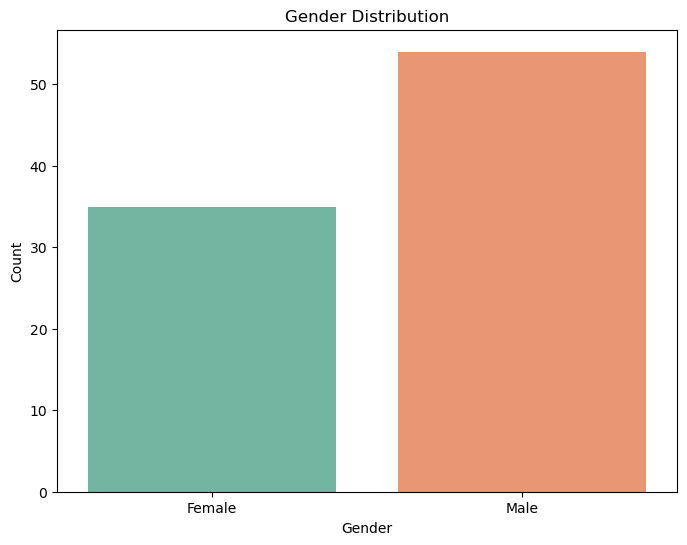

In [129]:
#Bar Chart for Gender Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Interpretation:

The gender distribution shows the survey respondents had more males than females, male respondents acounting for about 50% of the respondents

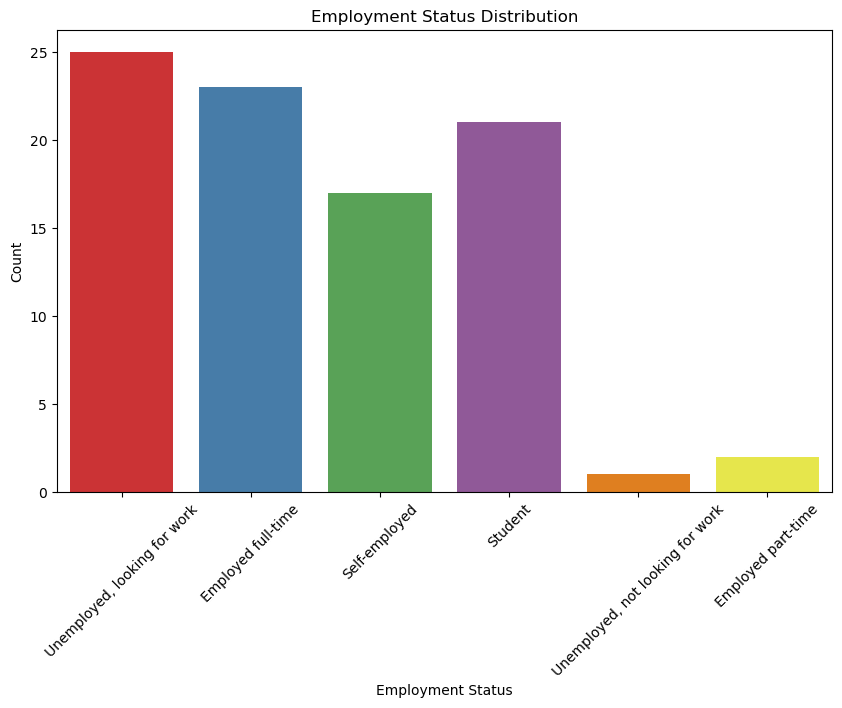

In [130]:
# Bar Chart Employment Distribution

# Employment status distribution bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', data=df, palette='Set1')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Interpretation:

The chart indicates that majority of the survey respondents are job searching. Closely followed by those who already have full-time jobs, while those w with part-time employment, and respondents who are unemployed yet not job searching are the minority group

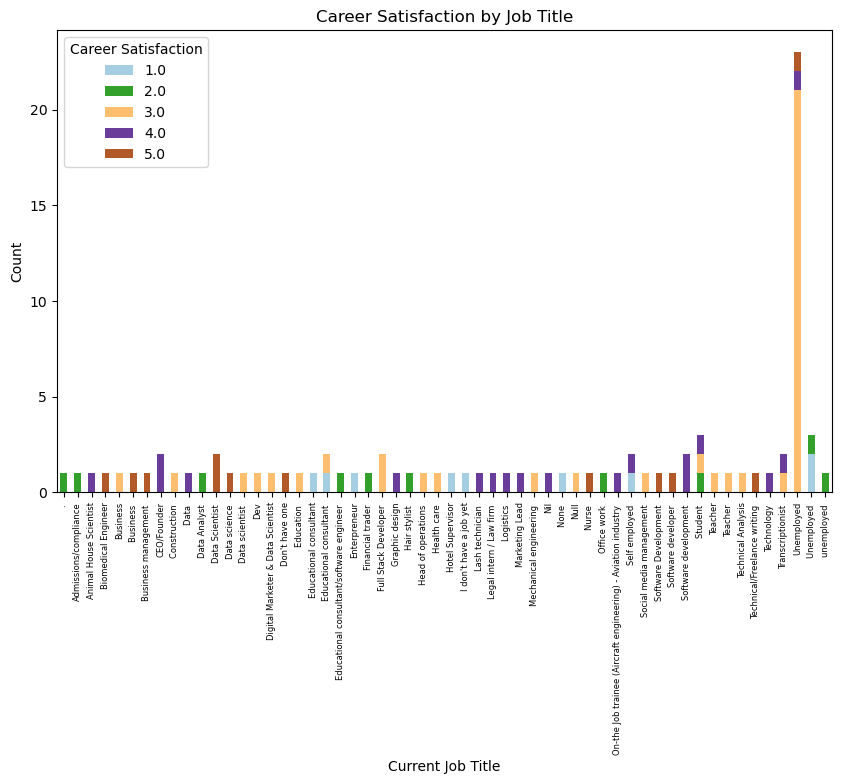

In [132]:
# Stacked Bar Chart for Career Satisfaction Across Different Job Titles
# Group data by job title and career satisfaction
job_satisfaction = df.groupby(['current_job_title', 'career_satisfaction']).size().unstack()

# Stacked bar chart
job_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Career Satisfaction by Job Title')
plt.xlabel('Current Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=6)
plt.legend(title='Career Satisfaction')
plt.show()


#### Interpretation:

What is immediately discernable from this visualization is that there are way too many unique job titles, which can make encoding tricky. As such, consolidating similar job titles into broader categories would be a logical next step. 

Interestingly, respondents who identified as 'unemployed' show the highest career satisfaction scores and account for the majority group as well. This could indicate that despite their job-seeking status, they are satisfied with their previous experiences or feel secure in their skills / qualifications, giving them confidence in their future prospects.


## **Feature Engineering**

#### Encoding Features

In [ ]:
#Encoding Age
df['age'] = df['age'].map({'45-54':3, '25-34':1, '35-44':2, '18-24':0})

In [ ]:
df['years_experience'].unique()

In [ ]:
df['years_experience'].value_counts()

In [ ]:
#Encode columns
# Encoding gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [ ]:
data.drop(columns=['What is your gender?'], inplace=True)